In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
train=pd.read_csv("titanic_train.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

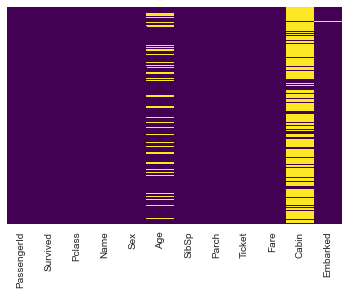

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

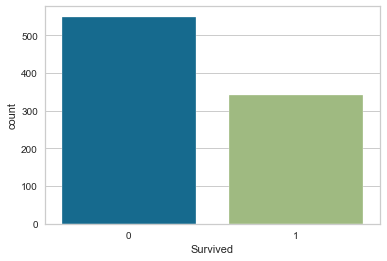

In [9]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

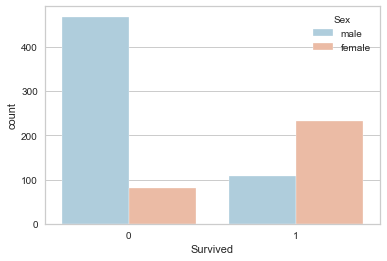

In [10]:
sns.countplot(x="Survived",hue="Sex",data=train,palette="RdBu_r")

<AxesSubplot:xlabel='Survived', ylabel='count'>

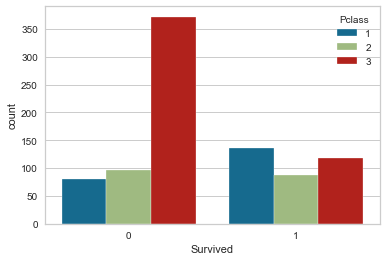

In [11]:
sns.countplot(x="Survived",hue="Pclass",data=train)

<AxesSubplot:xlabel='Age'>

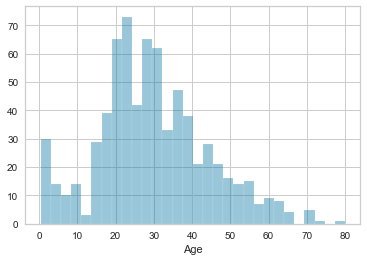

In [12]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

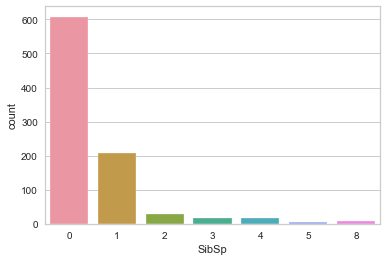

In [13]:
#we can use countplot to count the distribution of the values of a certain column,we can add hue to base that count on a certain catagory
sns.countplot(x="SibSp",data=train)

<AxesSubplot:xlabel='Fare'>

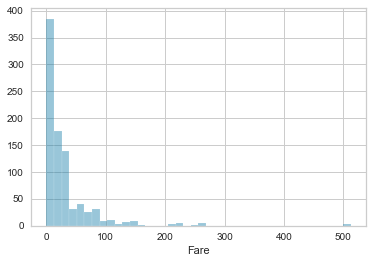

In [14]:
sns.distplot(train["Fare"],bins=40,kde=False)

In [15]:
import cufflinks as cf

In [16]:
cf.go_offline()

In [17]:
train["Fare"].iplot(kind='hist',bins=30)

In [19]:
#sns.countplot(x="Survived",hue="Age",data=train,hue_order=5)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

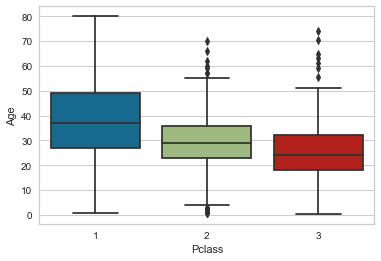

In [20]:
#plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=train)

In [31]:
#sns.countplot(x="Age",hue="Pclass",data=train,bins=100)

In [21]:
def impute_age(cols):
    age=cols[0]
    Pclass=cols[1]
    if pd.isnull(age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        if Pclass==3:
            return 24
    else:
        return age

In [22]:
train["Age"]=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

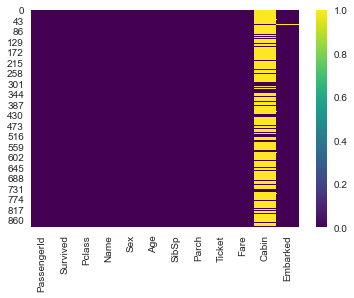

In [23]:
sns.heatmap(train.isnull(),cmap="viridis")#,yticklabels=False,cbar=False)

In [24]:
train.drop("Cabin",axis=1,inplace=True)

<AxesSubplot:>

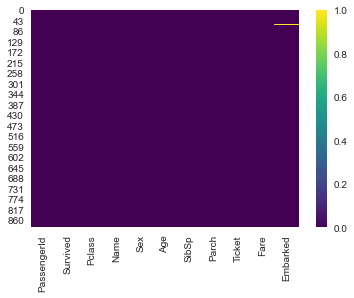

In [25]:
sns.heatmap(train.isnull(),cmap="viridis")


In [26]:
train.dropna(inplace=True)

<AxesSubplot:>

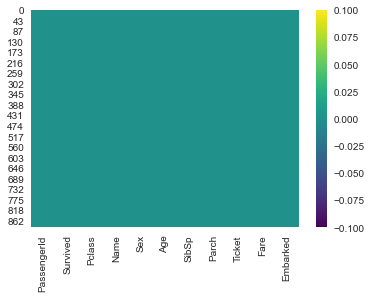

In [27]:
sns.heatmap(train.isnull(),cmap="viridis")


In [28]:
sex=pd.get_dummies(train["Sex"],drop_first=True)

In [29]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [30]:
train=pd.concat([train,sex,embark],axis=1)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [32]:
train.drop("PassengerId",axis=1,inplace=True)

In [33]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [34]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [35]:
X=train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y=train["Survived"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logm=LogisticRegression()

In [41]:
s=logm.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [67]:
pred=logm.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test,pred)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [2]:
from yellowbrick.model_selection import FeatureImportances

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:195: YellowbrickWarning:

detected multi-dimensional feature importances but stack=False, using mean to aggregate them.



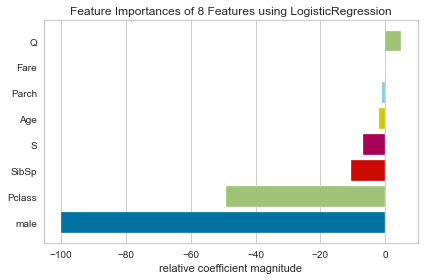

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [40]:
viz=FeatureImportances(logm)
viz.fit(X_train,y_train)
viz.show()

In [43]:
logm.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

<BarContainer object of 8 artists>

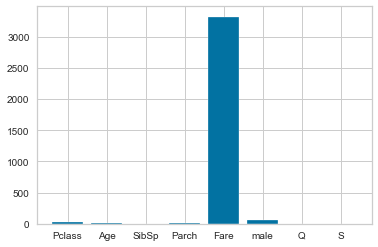

In [50]:
bestfeatures=SelectKBest(score_func=chi2,k=5)
viz=bestfeatures.fit(X_train,y_train)
#plt.bar(x=X_train.columns,height=viz.scores_)


<AxesSubplot:>

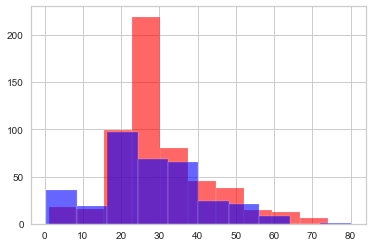

In [51]:
train[train["Survived"]==0]["Age"].hist(bins=10,alpha=.6,color="red")
train[train["Survived"]==1]["Age"].hist(bins=10,alpha=.6,color="blue")

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



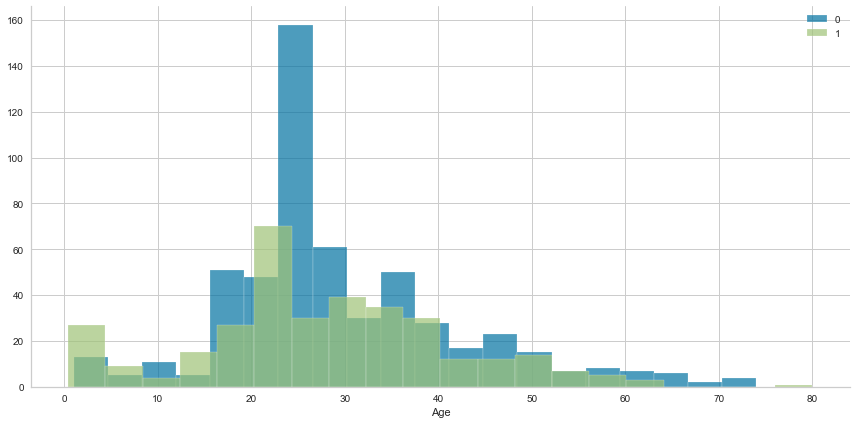

In [52]:
g=sns.FacetGrid(train,hue="Survived",size=6,aspect=2)
g=g.map(plt.hist,"Age",bins=20,alpha=.7)
plt.legend()